# Análise NBA

In [80]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')

In [81]:
# Base de dados
nba = pd.read_csv("NBA_Player_Stats.csv", sep = ',')
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,0.2,1.0,0.161,3.2,7.8,0.405,0.386,0.5,0.5,1.000,0.2,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-1998
1,2,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,0.1,0.3,0.211,2.4,5.7,0.414,0.409,1.4,2.1,0.672,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-1998
2,3,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,0.485,0.3,0.6,0.412,7.7,15.8,0.488,0.493,6.1,7.8,0.784,2.8,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-1998
3,4,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,1.1,2.9,0.375,1.8,3.7,0.469,0.510,1.3,1.7,0.784,0.3,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-1998
4,4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,0.414,0.5,1.7,0.313,1.1,2.2,0.494,0.483,0.7,1.0,0.676,0.2,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-1998


## Limpeza dos dados

In [82]:
# Exibir todas as 31 colunas
pd.set_option('display.max_columns', 31)

In [83]:
# Cinco primeiros registros
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,0.2,1.0,0.161,3.2,7.8,0.405,0.386,0.5,0.5,1.000,0.2,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-1998
1,2,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,0.1,0.3,0.211,2.4,5.7,0.414,0.409,1.4,2.1,0.672,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-1998
2,3,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,0.485,0.3,0.6,0.412,7.7,15.8,0.488,0.493,6.1,7.8,0.784,2.8,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-1998
3,4,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,1.1,2.9,0.375,1.8,3.7,0.469,0.510,1.3,1.7,0.784,0.3,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-1998
4,4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,0.414,0.5,1.7,0.313,1.1,2.2,0.494,0.483,0.7,1.0,0.676,0.2,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-1998


In [84]:
# Informações
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14573 entries, 0 to 14572
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      14573 non-null  int64  
 1   Player  14573 non-null  object 
 2   Pos     14573 non-null  object 
 3   Age     14573 non-null  int64  
 4   Tm      14573 non-null  object 
 5   G       14573 non-null  int64  
 6   GS      14573 non-null  int64  
 7   MP      14573 non-null  float64
 8   FG      14573 non-null  float64
 9   FGA     14573 non-null  float64
 10  FG%     14485 non-null  float64
 11  3P      14573 non-null  float64
 12  3PA     14573 non-null  float64
 13  3P%     12375 non-null  float64
 14  2P      14573 non-null  float64
 15  2PA     14573 non-null  float64
 16  2P%     14419 non-null  float64
 17  eFG%    14485 non-null  float64
 18  FT      14573 non-null  float64
 19  FTA     14573 non-null  float64
 20  FT%     13824 non-null  float64
 21  ORB     14573 non-null  float64
 22

Com base nessa útima linha de comando conseguimos identificar que há 5 colunas que possuem valores nulos: 'FG%', '3P%', '2P%', 'eFG%' e 'FT%'.

<AxesSubplot:>

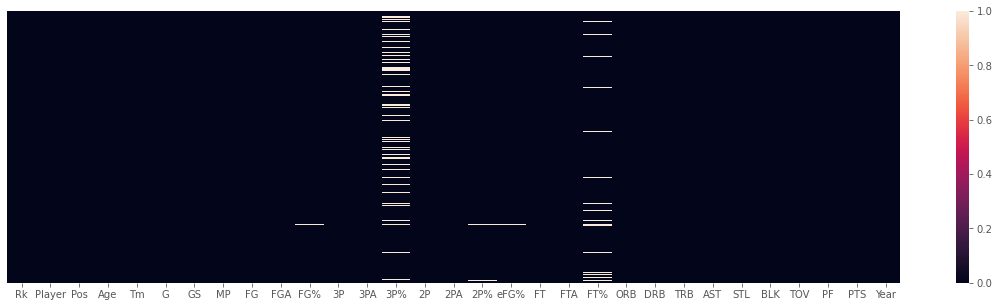

In [85]:
# Visualização dos valores nulos
plt.figure(figsize=(20,5))
sns.heatmap(nba.isnull(), yticklabels=False, cbar=True)

Podemos identificar que a coluna que mais apresenta valores nulos é a 3P%, que significa a porcentagem de cestas de 3 pontos por jogo

c:\Users\47540654848\Anaconda3\envs\My_Place\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Quantidade')

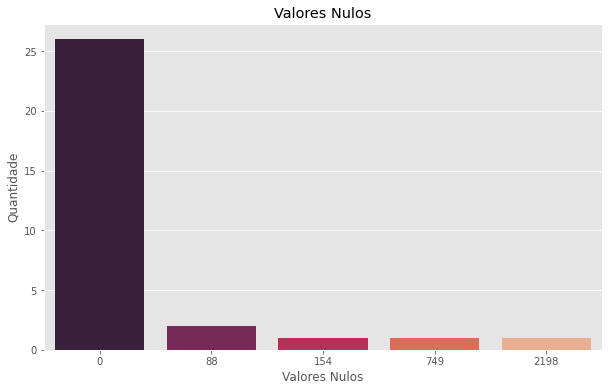

In [86]:
# Quantidade de valores nulos em gráfico
plt.figure(figsize=(10,6))
plt.title("Valores Nulos")
sns.countplot(nba.isnull().sum(), palette='rocket')
plt.xlabel("Valores Nulos")
plt.ylabel("Quantidade")

In [87]:
# Quantidade de dados (Linhas x Colunas)
nba.size

451763

In [88]:
# Quantidade de linhas e colunas, respectivamente
nba.shape

(14573, 31)

In [89]:
# Colunas
nba.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

In [90]:
# Deletando a coluna 'Rk'
nba.drop(columns='Rk', axis=1, inplace=True)

In [91]:
nba.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,0.2,1.0,0.161,3.2,7.8,0.405,0.386,0.5,0.5,1.000,0.2,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-1998
1,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,0.1,0.3,0.211,2.4,5.7,0.414,0.409,1.4,2.1,0.672,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-1998
2,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,0.485,0.3,0.6,0.412,7.7,15.8,0.488,0.493,6.1,7.8,0.784,2.8,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-1998
3,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,1.1,2.9,0.375,1.8,3.7,0.469,0.510,1.3,1.7,0.784,0.3,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-1998
4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,0.414,0.5,1.7,0.313,1.1,2.2,0.494,0.483,0.7,1.0,0.676,0.2,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-1998


In [92]:
nba['Year'].unique()

array(['1997-1998', '1998-1999', '1999-2000', '2000-2001', '2001-2002',
       '2002-2003', '2003-2004', '2004-2005', '2005-2006', '2006-2007',
       '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012',
       '2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017',
       '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022'],
      dtype=object)

## Análise

Vamos fazer algumas perguntas para nosso conjunto de dados:

1 - Quais foram os jogadores que mais pontuaram em 2021-2022?

2 - Quais foram os jogadores que menos pontuaram em 2021-2022?

3 - Qual foi o jogador que mais pontuou desde 1997?

4 - Qual a quantidade de jogadores por posição em 2011-2012?

5 - Qual a quantidade de jogadores por posição desde 1997?

6 - Qual é a frequência da idade dos jogadores desde 1997?

7 - Quem foi o jogador mais novo nos registros da NBA?

8 - Quem foi o jogador mais velho nos registros da NBA?

In [93]:
# Estatística descritiva
nba.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14485.000000,14573.000000,14573.000000,12375.000000,14573.000000,14573.000000,14419.000000,14485.000000,14573.000000,14573.000000,13824.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000
mean,26.705483,45.544500,21.565429,19.623626,2.932046,6.598586,0.432377,0.590894,1.703637,0.284298,2.341529,4.895409,0.464823,0.473485,1.401283,1.872422,0.726241,0.909984,2.522013,3.429953,1.758114,0.621540,0.390167,1.132368,1.781740,7.853057
std,4.252495,26.110389,27.035594,9.957188,2.133970,4.541544,0.104592,0.698191,1.840081,0.160299,1.859938,3.698337,0.113274,0.109297,1.350654,1.700262,0.152562,0.804527,1.766841,2.433847,1.761888,0.439759,0.460479,0.787383,0.826657,5.840447
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,22.000000,0.000000,11.400000,1.300000,3.100000,0.393000,0.000000,0.100000,0.222000,1.000000,2.100000,0.423000,0.438000,0.500000,0.700000,0.660000,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.600000,1.200000,3.400000
50%,26.000000,48.000000,7.000000,18.900000,2.400000,5.500000,0.435000,0.300000,1.100000,0.326000,1.800000,3.900000,0.470000,0.483000,1.000000,1.400000,0.750000,0.700000,2.200000,2.900000,1.200000,0.500000,0.200000,1.000000,1.800000,6.400000
75%,30.000000,70.000000,39.000000,27.700000,4.100000,9.200000,0.479000,1.000000,2.800000,0.375000,3.300000,6.800000,0.514000,0.524000,1.900000,2.500000,0.822000,1.300000,3.300000,4.600000,2.300000,0.900000,0.500000,1.500000,2.400000,11.100000
max,44.000000,85.000000,83.000000,43.700000,12.200000,27.800000,1.000000,5.300000,13.200000,1.000000,12.100000,23.400000,1.000000,1.500000,10.300000,13.100000,1.000000,6.800000,12.000000,18.000000,12.800000,3.000000,6.000000,5.700000,6.000000,36.100000


Aqui já podemos ter uma noção em termos de estatística da nossa base de dados

O que podemos extrair desses dados:

- A idade mínima é 18 anos

- A idade máxima é 44 anos

- A média da idade dos jogadores é de 26 anos

- A pontuação máxima foi de 36.1

- A Pontuação Mínima foi de 7.85

### 1 - Quais foram os jogadores que mais pontuaram em 2021-2022?

In [94]:
# Colocando em um outro DataFrame os jogadores de 2021-2022
nba2022 = nba[(nba['Year'] == '2021-2022')]
nba2022.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
13770,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,2021-2022
13771,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,2021-2022
13772,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,2021-2022
13773,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,2021-2022
13774,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,2021-2022


In [95]:
# Trazendo os 5 jogadores que mais pontuaram em 2021-2022 e armazenando em uma variável top5
first5 = nba2022.sort_values(by='PTS', ascending=False).head()
first5

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
13967,Joel Embiid,C,27,PHI,68,68,33.8,9.8,19.6,0.499,1.4,3.7,0.371,8.4,15.9,0.529,0.534,9.6,11.8,0.814,2.1,9.6,11.7,4.2,1.1,1.5,3.1,2.7,30.6,2021-2022
14129,LeBron James,SF,37,LAL,56,56,37.2,11.4,21.8,0.524,2.9,8.0,0.359,8.6,13.8,0.620,0.590,4.5,6.0,0.756,1.1,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3,2021-2022
13959,Kevin Durant,PF,33,BRK,55,55,37.2,10.5,20.3,0.518,2.1,5.5,0.383,8.4,14.8,0.568,0.570,6.8,7.4,0.910,0.5,6.9,7.4,6.4,0.9,0.9,3.5,2.1,29.9,2021-2022
13785,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,18.6,0.553,1.1,3.6,0.293,9.2,15.0,0.616,0.582,8.3,11.4,0.722,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9,2021-2022
13939,Luka Dončić,PG,22,DAL,65,65,35.4,9.9,21.6,0.457,3.1,8.8,0.353,6.8,12.8,0.528,0.529,5.6,7.5,0.744,0.9,8.3,9.1,8.7,1.2,0.6,4.5,2.2,28.4,2021-2022


Text(0, 0.5, 'Jogadores')

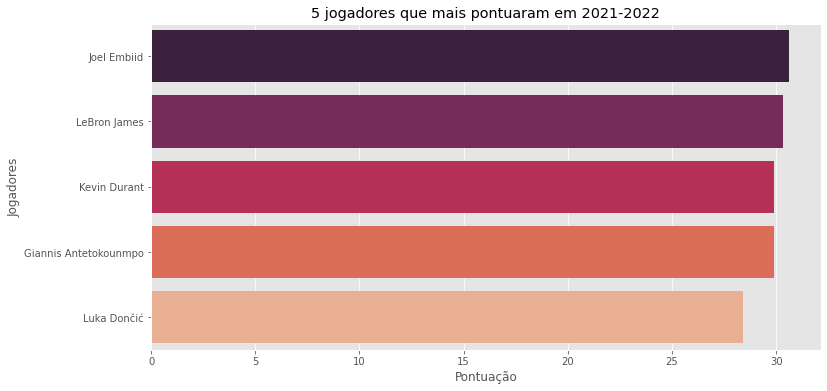

In [96]:
# Plot 5 jogadores que mais pontuaram em 2021-2022
plt.figure(figsize=(12,6))
plt.title("5 jogadores que mais pontuaram em 2021-2022")
sns.barplot(data=first5, x='PTS', y='Player', palette='rocket')
plt.xlabel('Pontuação')
plt.ylabel('Jogadores')

A maiorias dos valores que temos nesse dataset se trata de médias por partida, então, Joel Embii teve a maior média de pontos por partida

### 2 - Quais foram os jogadores que menos pontuaram em 2021-2022?

In [97]:
# Jogadores que menos pontuaram em 2022-2022, sendo a PTS(pontuação) diferente de 0
last5 = nba2022[(nba2022['PTS'] > 0)].sort_values(by='PTS', ascending=True).head()
last5

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
14176,George King,SF,28,DAL,4,0,4.8,0.0,1.3,0.000,0.0,1.0,0.000,0.0,0.3,0.00,0.000,0.3,0.5,0.5,0.0,1.3,1.3,0.0,0.0,0.0,0.3,1.0,0.3,2021-2022
14064,Aaron Henry,SF,22,PHI,6,0,2.8,0.2,0.8,0.200,0.0,0.2,0.000,0.2,0.7,0.25,0.200,0.0,0.0,NaN,0.0,0.2,0.2,0.0,0.0,0.3,0.3,0.3,0.3,2021-2022
14334,Miye Oni,SG,24,UTA,16,0,2.8,0.1,0.6,0.222,0.1,0.5,0.125,0.1,0.1,1.00,0.278,0.0,0.1,0.0,0.1,0.4,0.4,0.3,0.0,0.0,0.1,0.4,0.3,2021-2022
13902,Sharife Cooper,PG,20,ATL,13,0,3.0,0.2,1.1,0.214,0.1,0.5,0.167,0.2,0.6,0.25,0.250,0.0,0.0,NaN,0.0,0.4,0.4,0.4,0.0,0.0,0.4,0.1,0.5,2021-2022
14212,Scottie Lewis,SG,21,CHO,2,0,3.5,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.5,1.0,0.5,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.5,2021-2022


Text(0, 0.5, 'Jogadores')

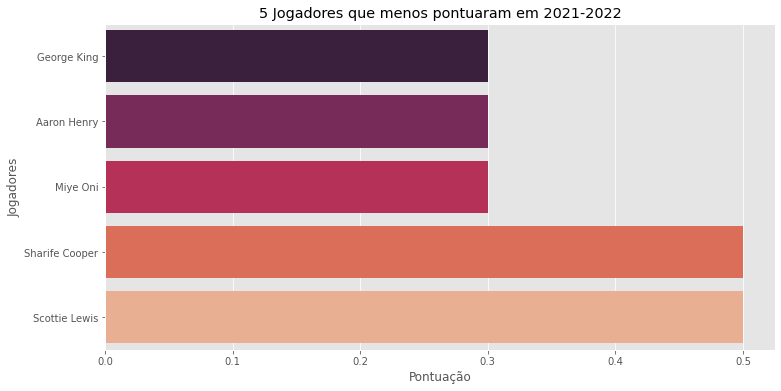

In [98]:
# Plot 5 jogadores que menos pontuaram em 2021-2022
plt.figure(figsize=(12,6))
plt.title("5 Jogadores que menos pontuaram em 2021-2022")
sns.barplot(data=last5, x='PTS', y='Player', palette='rocket')
plt.xlabel('Pontuação')
plt.ylabel('Jogadores')

A maiorias dos valores que temos nesse dataset se trata de médias por partida, então, George King, Aaron Henry, Miye Oni tiveram a menor média de pontos por partida

### 3 - Qual foi o jogador que mais pontuou desde 1997?

In [99]:
# DataFrame em ordem crescente da pontuação dos jogadores desde 1997
top5 = nba.sort_values(by='PTS', ascending=False).head(5)
top5

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
11994,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,4.8,13.2,0.368,6.0,11.3,0.528,0.541,9.7,11.0,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,2018-2019
4239,Kobe Bryant*,SG,27,LAL,80,80,41.0,12.2,27.2,0.450,2.3,6.5,0.347,10.0,20.7,0.482,0.491,8.7,10.2,0.850,0.9,4.4,5.3,4.5,1.8,0.4,3.1,2.9,35.4,2005-2006
12681,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,0.444,4.4,12.4,0.355,5.5,9.9,0.556,0.543,10.2,11.8,0.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,2019-2020
4401,Allen Iverson*,PG,30,PHI,72,72,43.1,11.3,25.3,0.447,1.0,3.1,0.323,10.3,22.2,0.465,0.467,9.4,11.5,0.814,0.6,2.6,3.2,7.4,1.9,0.1,3.4,1.7,33.0,2005-2006
2813,Tracy McGrady*,SG,23,ORL,75,74,39.4,11.1,24.2,0.457,2.3,6.0,0.386,8.7,18.2,0.481,0.505,7.7,9.7,0.793,1.6,4.9,6.5,5.5,1.7,0.8,2.6,2.1,32.1,2002-2003


Text(0, 0.5, 'Jogadores')

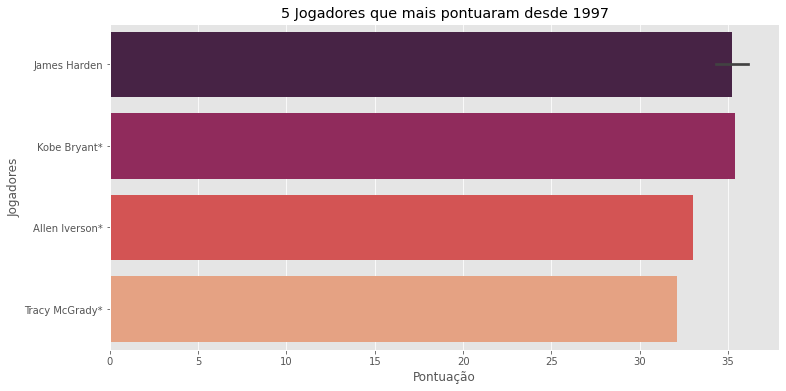

In [100]:
# Plot dos jogadores que mais pontuaram desde 1997
plt.figure(figsize=(12,6))
plt.title("5 Jogadores que mais pontuaram desde 1997")
sns.barplot(data=top5, x='PTS', y='Player', palette='rocket')
plt.xlabel('Pontuação')
plt.ylabel('Jogadores')

A maiorias dos valores que temos nesse dataset se trata de médias por partida, então, James Harden é o jogador que teve a maior média de pontos por partida desde 1997

James Harden foi o jogador que teve a maior pontuação desde 1997

In [112]:
# Dados de James Harden desde 2009
james_harden = nba[(nba['Player'] == 'James Harden')].sort_values(by='PTS', ascending=False).sort_values(by='Age', ascending=True)
james_harden

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
6590,James Harden,SG,20,OKC,76,0,22.9,3.1,7.6,0.403,1.2,3.3,0.375,1.8,4.3,0.424,0.484,2.6,3.2,0.808,0.6,2.6,3.2,1.8,1.1,0.3,1.4,2.6,9.9,2009-2010
7213,James Harden,SG,21,OKC,82,5,26.7,3.6,8.3,0.436,1.4,4.0,0.349,2.3,4.4,0.514,0.518,3.5,4.2,0.843,0.5,2.6,3.1,2.1,1.1,0.3,1.3,2.5,12.2,2010-2011
7776,James Harden,SG,22,OKC,62,2,31.4,5.0,10.1,0.491,1.8,4.7,0.390,3.1,5.4,0.579,0.582,5.0,6.0,0.846,0.5,3.6,4.1,3.7,1.0,0.2,2.2,2.4,16.8,2011-2012
8314,James Harden,SG,23,HOU,78,78,38.3,7.5,17.1,0.438,2.3,6.2,0.368,5.2,10.9,0.477,0.504,8.6,10.2,0.851,0.8,4.1,4.9,5.8,1.8,0.5,3.8,2.3,25.9,2012-2013
8922,James Harden,SG,24,HOU,73,73,38.0,7.5,16.5,0.456,2.4,6.6,0.366,5.1,9.9,0.515,0.529,7.9,9.1,0.866,0.8,3.9,4.7,6.1,1.6,0.4,3.6,2.4,25.4,2013-2014
9524,James Harden,SG,25,HOU,81,81,36.8,8.0,18.1,0.440,2.6,6.9,0.375,5.4,11.3,0.480,0.511,8.8,10.2,0.868,0.9,4.7,5.7,7.0,1.9,0.7,4.0,2.6,27.4,2014-2015
10120,James Harden,SG,26,HOU,82,82,38.1,8.7,19.7,0.439,2.9,8.0,0.359,5.8,11.7,0.494,0.512,8.8,10.2,0.860,0.8,5.3,6.1,7.5,1.7,0.6,4.6,2.8,29.0,2015-2016
10694,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,0.440,3.2,9.3,0.347,5.1,9.6,0.530,0.525,9.2,10.9,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1,2016-2017
11302,James Harden,SG,28,HOU,72,72,35.4,9.0,20.1,0.449,3.7,10.0,0.367,5.4,10.1,0.531,0.541,8.7,10.1,0.858,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4,2017-2018
11994,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,4.8,13.2,0.368,6.0,11.3,0.528,0.541,9.7,11.0,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,2018-2019


### 4 - Qual a quantidade de jogadores por posição em 2011-2012?

In [102]:
# Quantidade de jogados por posição em 2011-2012
nba2011 = nba[(nba['Year'] == '2011-2012')]

In [103]:
nba2011['Pos'].value_counts()

C        119
PG       113
PF       106
SF       103
SG        98
SF-PF      1
C-PF       1
PF-SF      1
Name: Pos, dtype: int64

Text(0, 0.5, 'Quantidade')

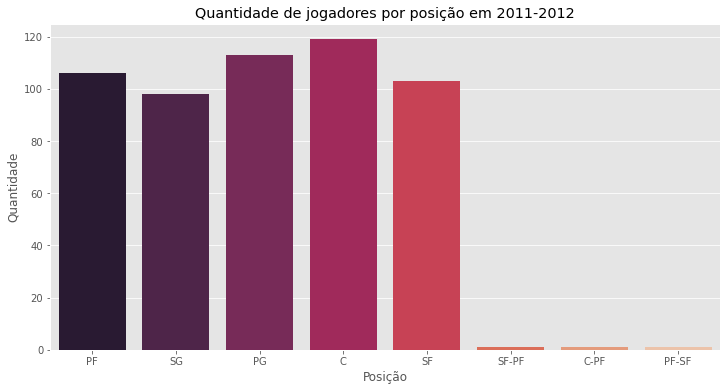

In [104]:
plt.figure(figsize=(12,6))
plt.title("Quantidade de jogadores por posição em 2011-2012")
sns.countplot(data=nba2011, x='Pos', palette='rocket')
plt.xlabel('Posição')
plt.ylabel('Quantidade')

A posição que mais teve jogadores em 2011-2012 foi a C (Pivô)

### 5 - Qual a quantidade de jogadores por posição desde 1997?

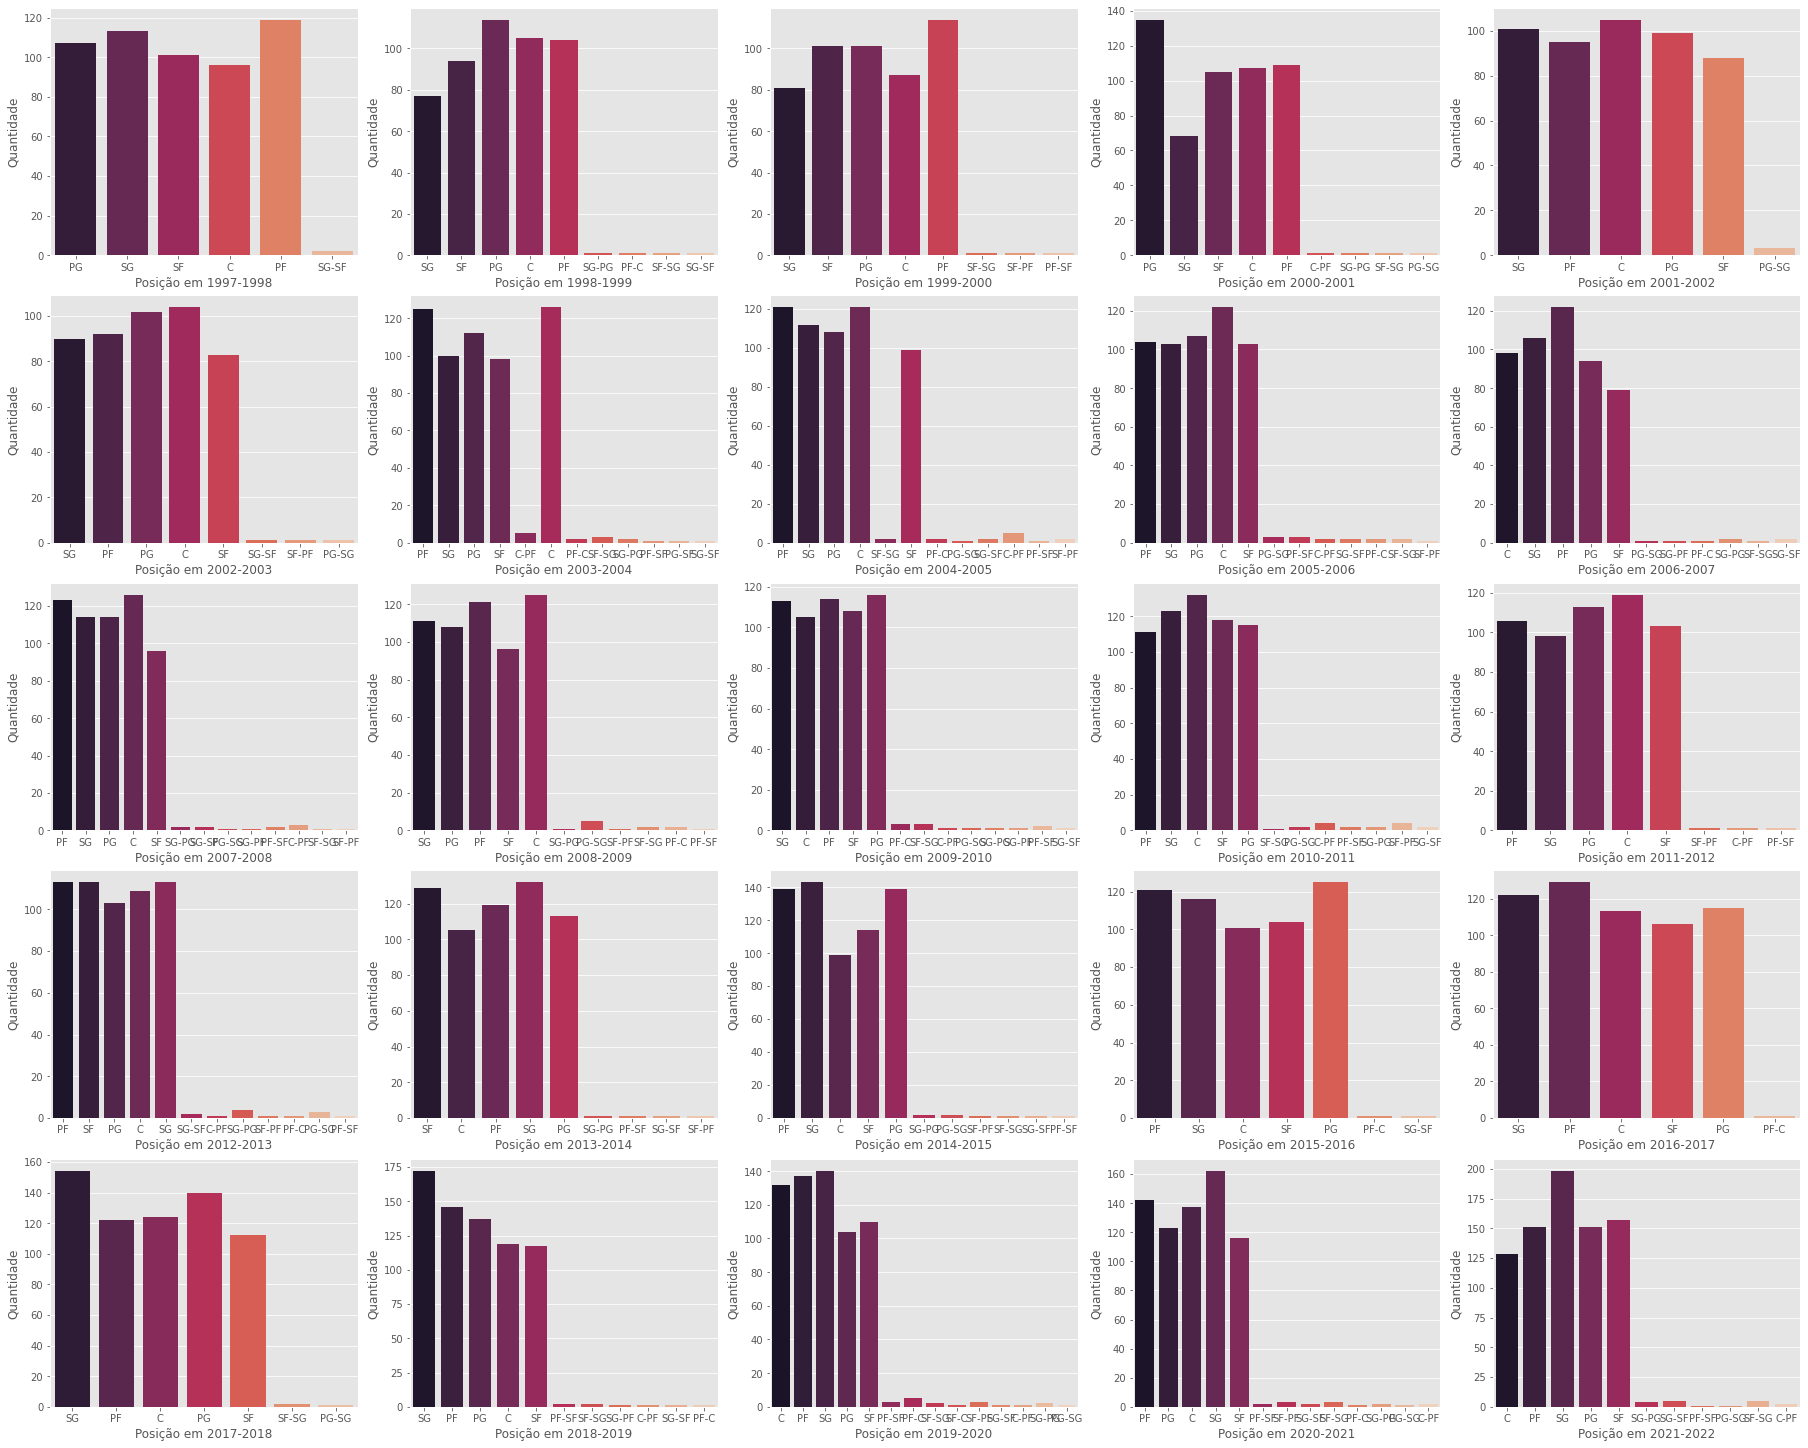

In [105]:
# Quantidade de jogadores por posição desde 1997
fig = plt.figure(figsize=(25,20), constrained_layout=True)
y = 0

for x in nba['Year'].unique():
    y=y+1
    tmp = nba.loc[(nba['Year'] == x)]
    plt.subplot(5,5,y)
    #plt.title("Nº de jogadores por posição")
    sns.countplot(data = tmp, x='Pos', palette='rocket')
    plt.xlabel(f"Posição em {x}")
    plt.ylabel("Quantidade")

### 6 - Qual é a frequência da idade dos jogadores desde 1997?

In [106]:
# Quantidade de jogadores por idade
idade_jogadores = nba['Age'].value_counts()
#idade_jogadores

Text(0, 0.5, 'Frequência')

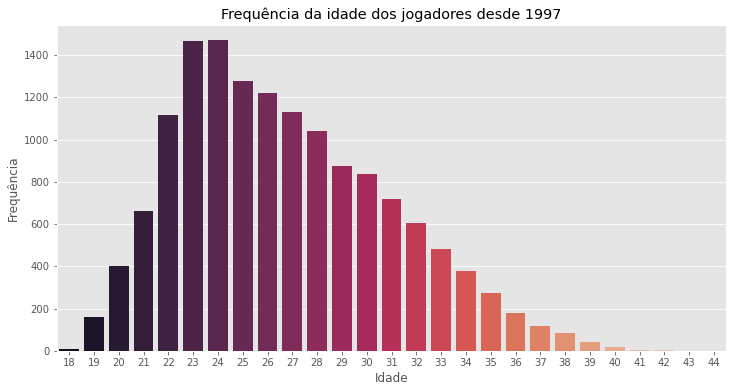

In [107]:
plt.figure(figsize=(12,6))
plt.title("Frequência da idade dos jogadores desde 1997")
sns.countplot(data=nba, x='Age', palette='rocket')
plt.xlabel('Idade')
plt.ylabel('Frequência')

A idade mais frequente dos jogadores é de 24 e 23 anos

### 7- Quais foram o jogadores mais novos nos registros da NBA?

In [108]:
jogador_novo = nba[(nba['Age'] == 18)]
jogador_novo

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
285,Tracy McGrady*,SF,18,TOR,64,17,18.4,2.8,6.2,0.450,0.2,0.6,0.341,2.6,5.6,0.462,0.467,1.2,1.7,0.712,1.6,2.6,4.2,1.5,0.8,1.0,1.0,1.3,7.0,1997-1998
715,Al Harrington,PF,18,IND,21,0,7.6,0.9,2.7,0.321,0.0,0.2,0.000,0.9,2.4,0.353,0.321,0.4,0.7,0.600,1.0,0.9,1.9,0.2,0.2,0.1,0.5,1.2,2.1,1998-1999
971,Bruno Šundov,C,18,DAL,3,0,3.7,0.7,2.3,0.286,0.0,0.0,NaN,0.7,2.3,0.286,0.286,0.0,0.0,NaN,0.0,0.0,0.0,0.3,0.0,0.0,0.3,1.3,1.3,1998-1999
3301,Maciej Lampe,C,18,PHO,21,0,10.7,2.0,4.2,0.489,0.0,0.2,0.000,2.0,4.0,0.512,0.489,0.5,0.6,0.769,0.4,1.7,2.1,0.4,0.1,0.1,0.7,1.3,4.6,2003-2004
3353,Darko Miličić,C,18,DET,34,0,4.7,0.5,1.9,0.262,0.0,0.0,0.000,0.5,1.9,0.266,0.262,0.4,0.7,0.583,0.3,0.9,1.3,0.2,0.2,0.4,0.4,1.0,1.4,2003-2004
3634,Andris Biedriņš,C,18,GSW,30,1,12.8,1.5,2.6,0.577,0.0,0.0,0.000,1.5,2.6,0.584,0.577,0.6,1.3,0.475,1.6,2.4,3.9,0.4,0.4,0.8,0.4,2.9,3.6,2004-2005
4247,Andrew Bynum,C,18,LAL,46,0,7.3,0.7,1.8,0.402,0.0,0.0,NaN,0.7,1.8,0.402,0.402,0.2,0.6,0.296,0.7,1.0,1.7,0.2,0.1,0.5,0.4,1.2,1.6,2005-2006
4423,Amir Johnson,SF,18,DET,3,0,13.0,2.3,3.3,0.700,0.7,1.0,0.667,1.7,2.3,0.714,0.800,1.3,1.3,1.000,1.0,0.3,1.3,1.0,0.0,0.7,1.3,2.3,6.7,2005-2006
4446,Yaroslav Korolev,SF,18,LAC,24,0,5.3,0.4,1.3,0.300,0.1,0.3,0.286,0.3,1.0,0.304,0.333,0.3,0.4,0.700,0.2,0.3,0.5,0.4,0.1,0.0,0.3,0.5,1.1,2005-2006
4488,C.J. Miles,PG,18,UTA,23,0,8.8,1.2,3.3,0.368,0.2,0.9,0.250,1.0,2.4,0.411,0.401,0.8,1.0,0.750,0.8,0.9,1.7,0.7,0.3,0.1,0.4,0.9,3.4,2005-2006


O interesse desses dados é que depois de 2006 não entrou mais nenhum jogador de 18 anos

### 8 - Quais foram o jogadores mais velhos nos registros da NBA?

In [109]:
jogadores_velhos = nba[(nba['Age'] == 44)]
jogadores_velhos

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
5223,Kevin Willis,PF,44,DAL,5,0,8.6,1.0,2.6,0.385,0.0,0.0,NaN,1.0,2.6,0.385,0.385,0.4,0.4,1.0,0.4,1.2,1.6,0.2,0.4,0.2,0.4,2.2,2.4,2006-2007


Os únicos anos que tivemos um jogador de 44 anos foi em 2006-2007